[View in Colaboratory](https://colab.research.google.com/github/sunnybarnwal/Big_mart/blob/master/Big_Mart_Sales_predition.ipynb)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df=pd.read_csv('https://raw.githubusercontent.com/sunnybarnwal/Big_mart/master/Big_mart.csv')

In [80]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [81]:
df.shape

(8523, 12)

In [82]:
df.size

102276

In [83]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [84]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We can see that there are many null values in Item_Weight and Outlet_size so we have to fill all the null values

In [85]:
list(df.columns)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

We are going to check the frequency of every thng for further analysis

In [86]:
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier']]
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df[col].value_counts())



Frequency of Categories for varible Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

F

Filling the column Item_weight with its mean

In [0]:
df['Item_Weight'] = df['Item_Weight'].fillna((df['Item_Weight'].mean()))

Filling the column Outlet_size with missing 

In [88]:
#df.Outlet_Size = df.Outlet_Size.fillna('Missing')
from scipy.stats import mode
outletSizeMode = {}
for i in set(df['Outlet_Type']):
  outletSizeMode[i] = df[df['Outlet_Type'] == i]['Outlet_Size'].mode()[0]

print(outletSizeMode)


{'Supermarket Type3': 'Medium', 'Supermarket Type1': 'Small', 'Grocery Store': 'Small', 'Supermarket Type2': 'Medium'}


In [89]:
miss_bool = df['Outlet_Size'].isnull()
print ('\nOrignal #missing value in Outlet_Size: %d'% sum(miss_bool))
df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outletSizeMode[x])
print ("Now missing value count in Outlet size:",sum(df['Outlet_Size'].isnull()))


Orignal #missing value in Outlet_Size: 2410
Now missing value count in Outlet size: 0


In [90]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Now we have fullfilled all the null value

Now we will correct the mis-coded values(i.e Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’ and some of ‘Regular’ are mentioned as ‘regular’ and 'reg'.)

In [0]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF': 'Low Fat'}, regex=True)
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'low fat': 'Low Fat'}, regex=True)
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'reg': 'Regular'}, regex=True)
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'regular': 'Regular'}, regex=True)

We have Performed Data cleaning on the data set

As we have removed all the null values and also corrected the mis-coded value


##Now we will prepare EDA Report of the given dataset
##Big_Mart_Sales
![Big_Mart](https://content3.jdmagicbox.com/comp/kolkata/u2/033pxx33.xx33.170619210052.b7u2/catalogue/big-mart-world-new-town-kolkata-grocery-stores-talhp.jpg)
##Objective
Our project is to perform data cleaning,   Make a Exploratory Data Analysis,  Visualize distributions and correlation of features,  Build a linear regression model taking the selected features through feature engineering and Pedict the item_outlet_sales for the test data.

##Description of data
It have 8523  rows and 12  columns and total number of dataset are 102276.
There are many samples of item to predict the item_outlet_sales.

##Attribute Information
The list of information on whose basis we will predict the item_outlet_sales are

1. Item_Weight
2. Item_Fat_Content
3. Item_Visibility
4. Item_Type
5. Item_MRP
6. Outlet_Identifier
7. Outlet_Establishment_Year
8. Outlet_Size
9. Outlet_Location_Type
10. Outlet_Type
11. Item_Outlet_Sales
12. Item_Identifier

##UNIVARIANTE ANALYSIS

Here we will analyse every variable one by one

###Countplot of Item_weight




Text(0.5,1,'Item Weight COUNTPLOT')

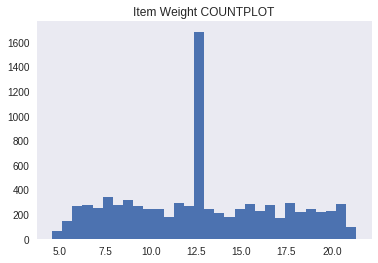

In [15]:
plt.hist(x="Item_Weight",data= df,bins=30)
plt.grid()
plt.title("Item Weight COUNTPLOT")

We can observe that
1. Most of the item weight is of 12-13
2. Continious in nature and very few outliers are present
3. Doesnot contain skewness, 12.5 is the mean weight
#Count plot of Item Fat content


Text(0.5,1,'Item Weight COUNTPLOT')

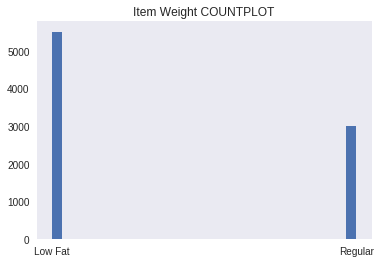

In [16]:
plt.hist(x="Item_Fat_Content",data= df,bins=30)
plt.grid()
plt.title("Item Weight COUNTPLOT")

We can observe that
1. Low fat item are more than regular item
#Count plot of Item_MRP

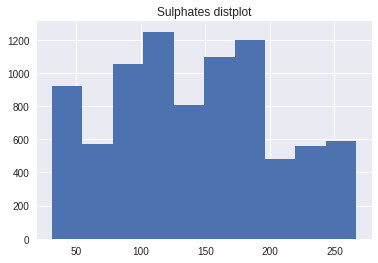

In [17]:
plt.hist(df['Item_MRP' ])
plt.title("Sulphates distplot")
plt.show()

We can say that
1. Major product have the MRP between 50-200
2. No outliers is present and graph is continious
#Bar plot of Item type

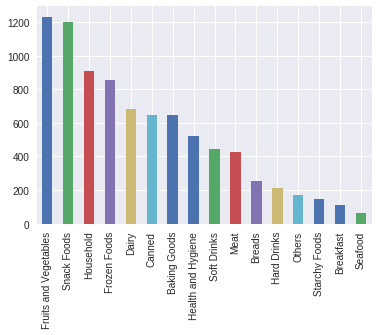

In [18]:
df['Item_Type'].value_counts().plot.bar()

We can say that
1. Major items are Fruits and vegetable, snack, household, dairy,canned and baking goods
2. There are very less breakfast, starchy and seafood items
#Displot of Item_Visibility

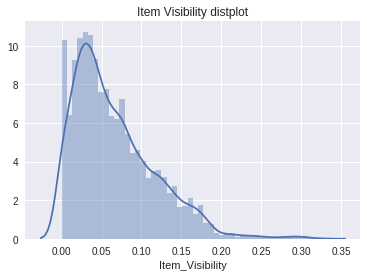

In [19]:
sns.distplot(df['Item_Visibility'])
plt.title("Item Visibility distplot")
plt.show()

We can say that 
1. Most of the product have visibility less than .20
2. The graph is having skewness and there are some outliers present
#Count plot of Outlet Type


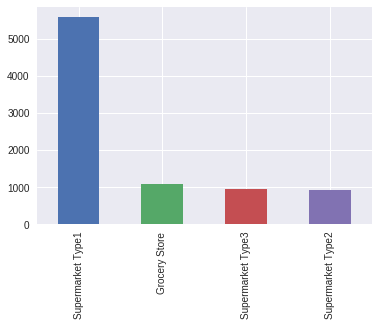

In [20]:
df['Outlet_Type'].value_counts().plot.bar()

We can say that 
1. Super market type-1 is very large in number
2. Rest 3 are almost same in number
#Count plot of Outlet location type

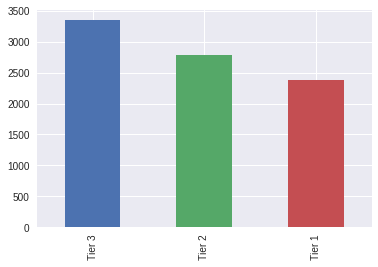

In [21]:
df['Outlet_Location_Type'].value_counts().plot.bar()

#Bivariate Analysis
Numerical 

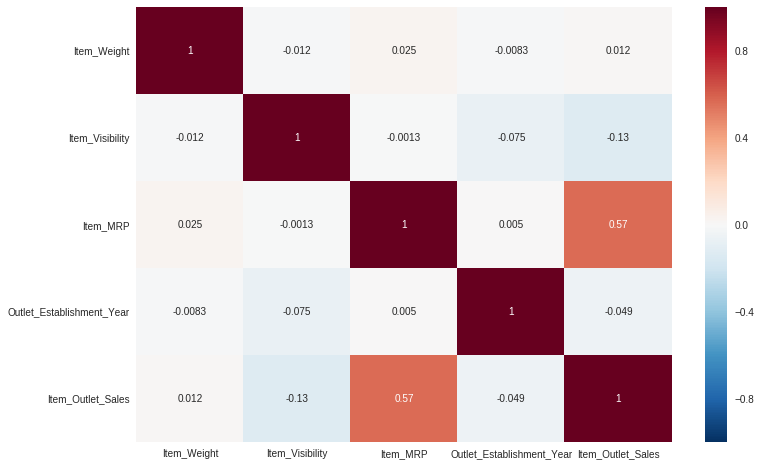

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

#Box Plot of Outlet_Identifier vs Item_Outlet_Sales

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5,1,'Sales and Outlet identifier box plot')

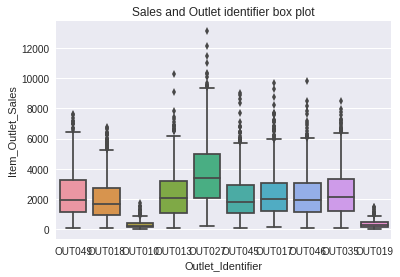

In [23]:
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df)
plt.title("Sales and Outlet identifier box plot")


We can say that 
1. Most of the outlets sales is between 1000 to 4000
2. There is some outliers present 
#Box plot of Item type vs Item visibilty of All Outlet type

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


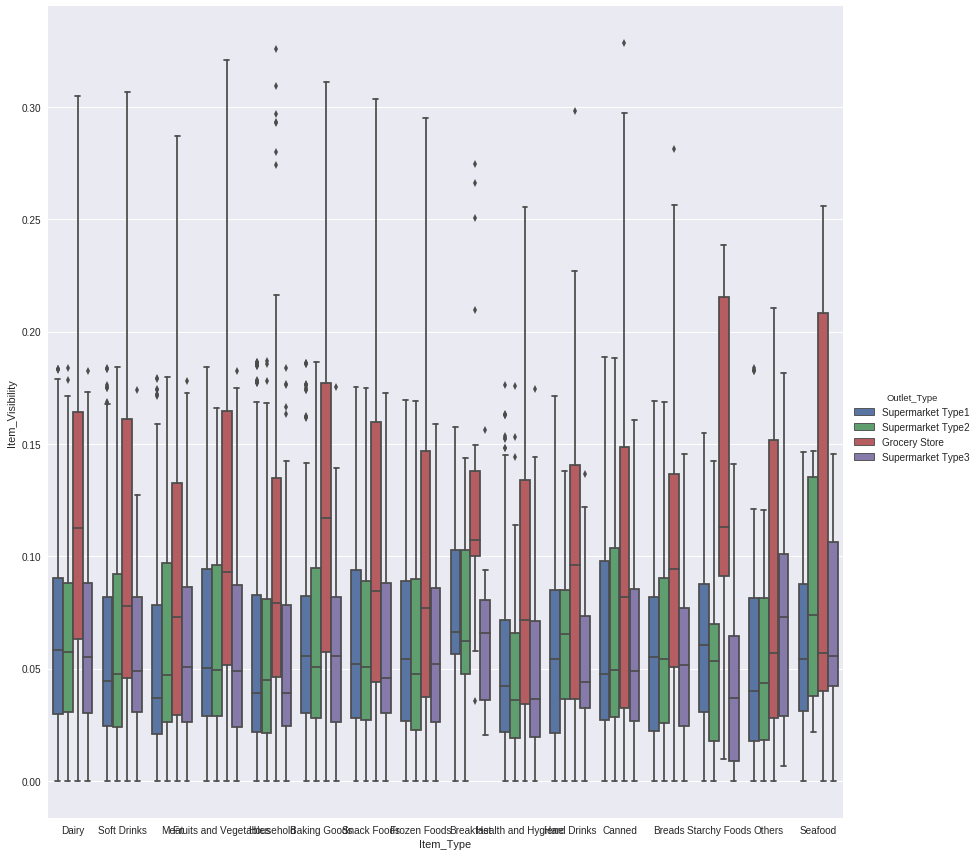

In [24]:
sn=sns.factorplot(x="Item_Type", y="Item_Visibility",hue="Outlet_Type",data=df, kind="box",size=12, aspect=1)

We can say that
1. Grocery store type has more visibilty
2. there are few outliers present in the graph
#Pair plot of Item visibilty and Item Outlet sales for different outlet type

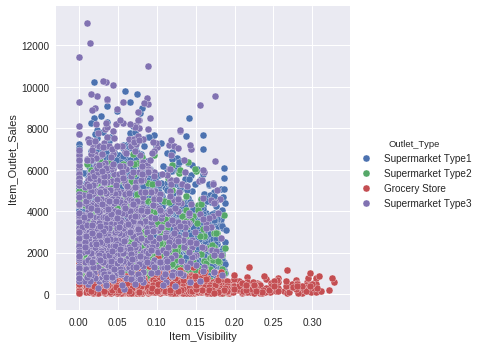

In [25]:
sns.pairplot(x_vars=['Item_Visibility'], y_vars=['Item_Outlet_Sales'], data=df, hue="Outlet_Type", size=5)

We can say that
1. Most of the sales are of item visibility in the range 0-.20
2. Grocery store are having sales less than 2000 for most of the visibility
3. there are few outliers present 
#ItemWeigth vs Item outlet sale Regplot

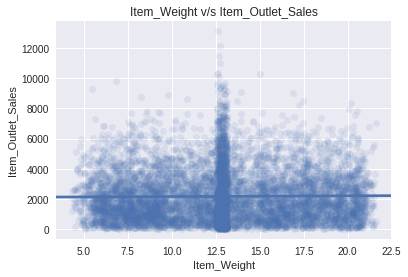

In [27]:
sns.regplot(x='Item_Weight',y='Item_Outlet_Sales',data=df,x_jitter=0.3,scatter_kws={'alpha':0.1})
plt.title("Item_Weight v/s Item_Outlet_Sales")
plt.show()

There is nothing much to be concluded from this plot

1. High number of product have weight near 12.5

2. Major sales is less than 2000
#Scatter plot of Item_MRP and Item outlet sales



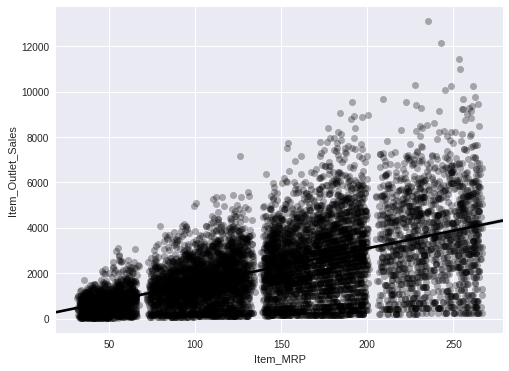

In [28]:
plt.figure(figsize=(8,6));
sns.regplot('Item_MRP', 'Item_Outlet_Sales', data=df, x_jitter=0.3, scatter_kws={'alpha':0.3}, color='black');

We can say that
1. Their is positive correlation between Item Mrp and Item outlet sales
2. Item having low price are sold heaveily in numer as the graph is denser at low MRP
3. Few outliers are present in the data 

EDA report is done we have gone thru various variables and their plot and studied about the data and their nature
Now we will come to the part FEATURE ENGINEERING
#FEATURE ENGINEERING
We have seen some diiference in the data Now we will remove that difference and make our data ready for analysis. Some new variables may be created to resolve these difference using the given variables


In [92]:
data = df.copy()
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


We have created a copy of original data and now we will perform feature engineering on that

In [93]:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


There is lot of diffference in the sell of all Outlet type so we will leave it as it is.


In [94]:
data.pivot_table(values='Item_Outlet_Sales',index='Item_Type')

,Item_Outlet_Sales
Item_Type,
Baking Goods,1952.971207
Breads,2204.132226
Breakfast,2111.808651
Canned,2225.194904
Dairy,2232.542597
Frozen Foods,2132.867744
Fruits and Vegetables,2289.009592
Hard Drinks,2139.221622
Health and Hygiene,2010.000265


There is very less difference in sell and we can combine various item as single Like(Baking Goods, Breads, Breakfast fruits and vegetables meat   as food and dairy, hard drinks soft drinks as drinks and rest as Non Consumable)

In [95]:
data['CombineItemType'] = data['Item_Identifier'].apply(lambda x : x[0:2])
data['CombineItemType'].head(20)

0     FD
1     DR
2     FD
3     FD
4     NC
5     FD
6     FD
7     FD
8     FD
9     FD
10    FD
11    FD
12    FD
13    FD
14    FD
15    FD
16    NC
17    FD
18    DR
19    FD
Name: CombineItemType, dtype: object

In [96]:
data['CombineItemType'] = data['CombineItemType'].map({'FD':'Fooding', 'DR':'Drinking', 'NC':'NonConsumable'})
data['CombineItemType'].value_counts()

Fooding          6125
NonConsumable    1599
Drinking          799
Name: CombineItemType, dtype: int64

NOW We will modify Item Visibility

As there are visibilty of some item as '0' which make no sense so we will replace it with mean of visibilty

In [97]:
data['Item_Visibility'].replace(0,data['Item_Visibility'].mean(),inplace=True)
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values after modification: 0


WE will modify Establishment Year
As we know that we are having the data of sales collected in 2013

Older the store greater the sales as they have faith on the store

In [98]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

In [99]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['CombineItemType']=="NonConsumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

Now we will do label encoding 



In [0]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','CombineItemType','Outlet_Type','Outlet_Identifier']
for item in categorical_cols:
  data[item] = le.fit_transform(data[item])

In [0]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'CombineItemType',])

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null int64
Outlet_Establishment_Year    8523 non-null int64
Item_Outlet_Sales            8523 non-null float64
Outlet_Years                 8523 non-null int64
Item_Fat_Content_0           8523 non-null uint8
Item_Fat_Content_1           8523 non-null uint8
Item_Fat_Content_2           8523 non-null uint8
Outlet_Location_Type_0       8523 non-null uint8
Outlet_Location_Type_1       8523 non-null uint8
Outlet_Location_Type_2       8523 non-null uint8
Outlet_Size_0                8523 non-null uint8
Outlet_Size_1                8523 non-null uint8
Outlet_Size_2                8523 non-null uint8
O

We are dropping those columns which seems of no use in our feature

In [103]:
x=  data.drop(['Item_Identifier', 'Item_Type', 'Outlet_Establishment_Year', 'Item_Outlet_Sales','Outlet_Identifier'], axis=1)
y = data['Item_Outlet_Sales']
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,CombineItemType_0,CombineItemType_1,CombineItemType_2
0,9.30,0.016047,249.8092,14,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,4,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,14,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,19.20,0.066132,182.0950,15,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
4,8.93,0.066132,53.8614,26,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1


We are finished with our feature part
Now we will train and split our dataset

In [0]:
from  sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

Now we will apply various model on our dataset and get the accuracyscore 
#Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr=LinearRegression()

In [107]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
pred=lr.predict(x_test)

In [110]:
lr.score(x_train, y_train)

0.5638254646533651

In [111]:
from  sklearn import metrics
print('MeanAbsoluteError:',  metrics.mean_absolute_error(y_test, pred))
print('MeanSquareError:', metrics.mean_squared_error(y_test, pred))
print('RootMeanSquareError:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MeanAbsoluteError: 824.7327909209841
MeanSquareError: 1206361.8622420523
RootMeanSquareError: 1098.3450560921428


##Ensembel Method
###Gradient Boosting Regressor

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
gbr=GradientBoostingRegressor()

In [114]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [115]:
gbr.score(x_test,y_test)

0.5982098269515473

In [0]:
gpred=gbr.predict(x_test)

In [118]:
from  sklearn import metrics
print('MeanAbsoluteError:',  metrics.mean_absolute_error(y_test, gpred))
print('MeanSquareError:', metrics.mean_squared_error(y_test, gpred))
print('RootMeanSquareError:', np.sqrt(metrics.mean_squared_error(y_test, gpred)))

MeanAbsoluteError: 742.5439459495905
MeanSquareError: 1095024.7703824337
RootMeanSquareError: 1046.4343125024302


##Use GridSearchCV to find the best parameter for GradientBoostingRegressor

In [119]:
from sklearn.model_selection import GridSearchCV
grid_para={'n_estimators':[10,50,100,500,1000]}
gsc=GridSearchCV(GradientBoostingRegressor(),grid_para)
gsc.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [121]:
gsc.best_params_

{'n_estimators': 50}

In [122]:
gbr_grid=GradientBoostingRegressor( n_estimators=50)
gbr_grid.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [123]:
gbr_grid.score(x_test,y_test)

0.6018794788208011

#DecisionTreeRegressor

In [0]:
from sklearn.tree import DecisionTreeRegressor
DTR= DecisionTreeRegressor()

In [125]:
DTR.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

###FINDING Accuracy score

In [126]:
DTR.score(x_test,y_test)

0.14114352905524297

very low accuracy score so we will not this algorithm here

In [0]:
dpred=DTR.predict(x_test)

In [128]:
from  sklearn import metrics
print('MeanAbsoluteError:',  metrics.mean_absolute_error(y_test, dpred))
print('MeanSquareError:', metrics.mean_squared_error(y_test, dpred))
print('RootMeanSquareError:', np.sqrt(metrics.mean_squared_error(y_test, dpred)))

MeanAbsoluteError: 1075.4454578299121
MeanSquareError: 2340697.1423722124
RootMeanSquareError: 1529.933705221312


#RandomForestRegressor

In [129]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [130]:
rfr.score(x_test,y_test)

0.47891160260594334

In [0]:
rpred=rfr.predict(x_test)

In [132]:
from sklearn import metrics
print('MeanAbsoluteError:',  metrics.mean_absolute_error(y_test, rpred))
print('MeanSquareError:', metrics.mean_squared_error(y_test, rpred))
print('RootMeanSquareError:', np.sqrt(metrics.mean_squared_error(y_test, rpred)))

MeanAbsoluteError: 828.286322733138
MeanSquareError: 1420155.9445222344
RootMeanSquareError: 1191.70295985293


##Use GridSearchCV to find the best parameter for RandomforestRegressor

In [138]:
from sklearn.model_selection import GridSearchCV
grid_para={'n_estimators':[50,100,150,200,500],'max_depth':[2,4,5,6,7,8]}
gsb=GridSearchCV(RandomForestRegressor(),grid_para)
gsb.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 150, 200, 500], 'max_depth': [2, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [139]:
gsb.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [0]:
grid_rbr=RandomForestRegressor(max_depth= 5, n_estimators= 200)

In [144]:
grid_rbr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [145]:
grid_rbr.score(x_test,y_test)

0.5989059246676622

#Conclusion
We have imported data and performed cleaning and then we have made an EDA on the data and then we have done FEATURE ENGINEERING.

Then we have train and split the data and perform various Algorithm (i.e:- Random forest, Gradient boosing , Linear Regression and Gradient tree Regressor) and calculated the Accuracy score and come to the conclusion that Gradient Boosting REgressor have the best result that is near to 60% which is also not quite good